<h1 style="color:#2E86C1; text-align:center;"> Visualize Key Insights from a DataSet</h1>


<h2 style="color:#117A65;">🔹 Step 1: Import Libraries</h2>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

main_color = "#20B2AA"   # LightSeaGreen
highlight_color = "#F5B7B1"  # Light Pink


<h2 style="color:#117A65;">🔹 Step 2: Load Dataset</h2>

In [19]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

def style_table(df, bg_color="#20B2AA"):
    return df.style.set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', bg_color),
                    ('color', 'white'),
                    ('border', '1px solid black'),
                    ('padding', '8px'),
                    ('font-weight', 'bold')]},
         {'selector': 'td',
          'props': [('border', '1px solid black'),
                    ('padding', '8px')]}]
    ).set_properties(**{'text-align': 'center'})

display(style_table(df.head()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


<h2 style="color:#117A65;">🔹 Step 3: DataSet Overview</h2>

In [28]:
df.info()
display(style_table(df.describe()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2 style="color:#117A65;">🔹 Step 4: Univariate Analysis</h2>


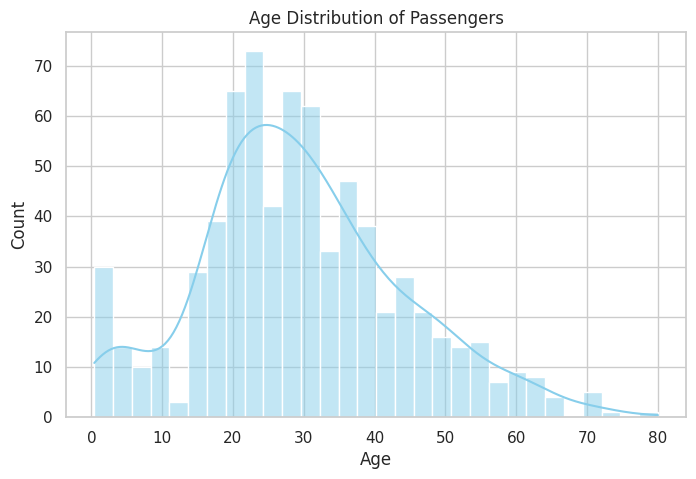

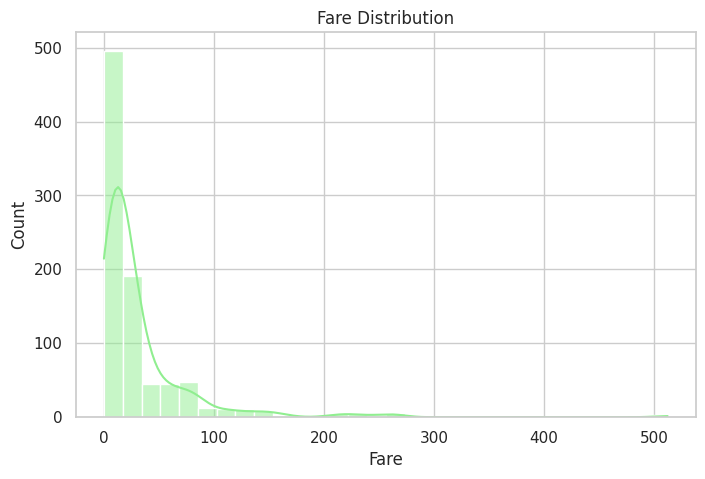

/tmp/ipython-input-3143681509.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Pclass", palette="Set2")


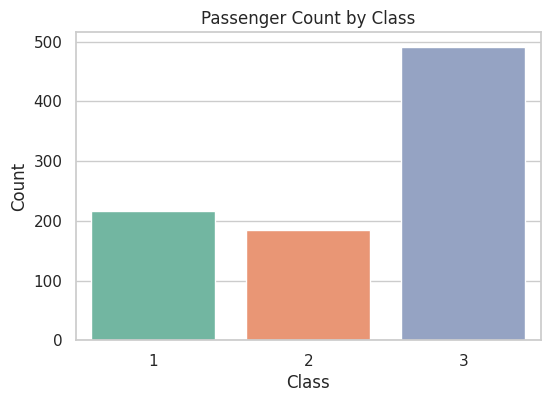

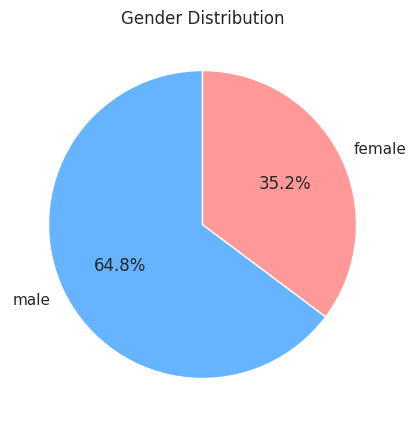

In [29]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True, color="lightgreen")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Passenger Class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", palette="Set2")
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Gender distribution (Pie chart)
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=["#66b3ff","#ff9999"], startangle=90)
plt.title("Gender Distribution")
plt.show()


<h2 style="color:#117A65;">🔹 Step 5: Bivariate Analysis</h2>

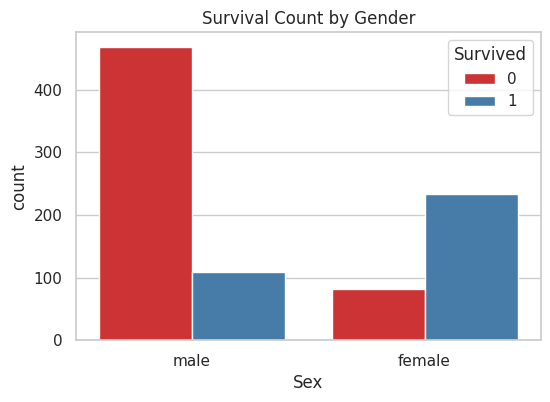

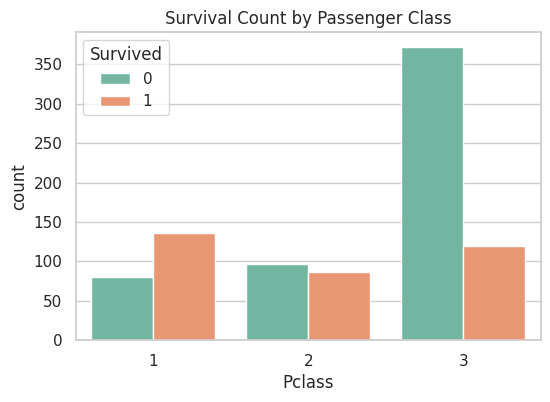

/tmp/ipython-input-3260142713.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Pclass", y="Fare", palette="Set3")


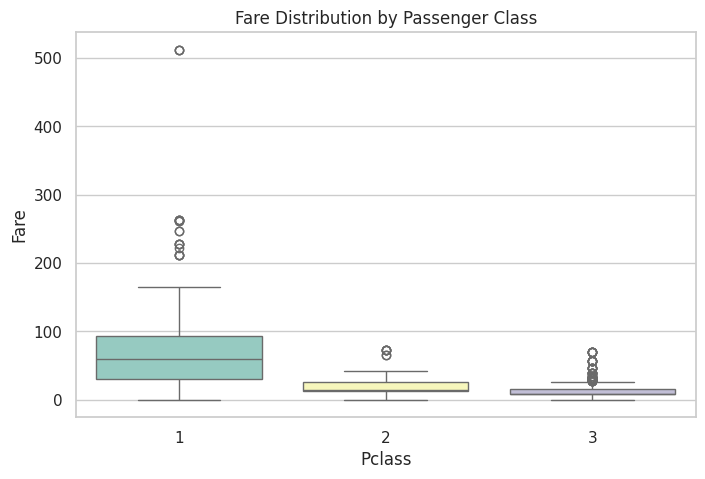

/tmp/ipython-input-3260142713.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sex", y="Age", palette="coolwarm")


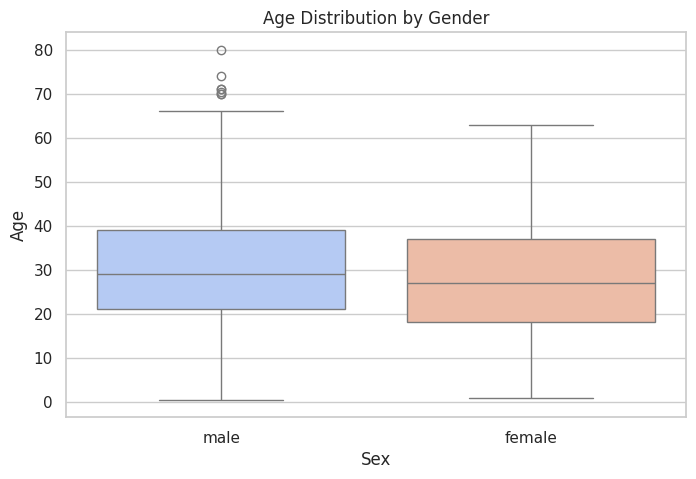

In [30]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set1")
plt.title("Survival Count by Gender")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="Set2")
plt.title("Survival Count by Passenger Class")
plt.show()

# Boxplot - Fare vs Class
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Pclass", y="Fare", palette="Set3")
plt.title("Fare Distribution by Passenger Class")
plt.show()

# Boxplot - Age vs Gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sex", y="Age", palette="coolwarm")
plt.title("Age Distribution by Gender")
plt.show()


<h2 style="color:#117A65;">🔹 Step 5: Multivariate Analysis</h2>

<Figure size 800x500 with 0 Axes>

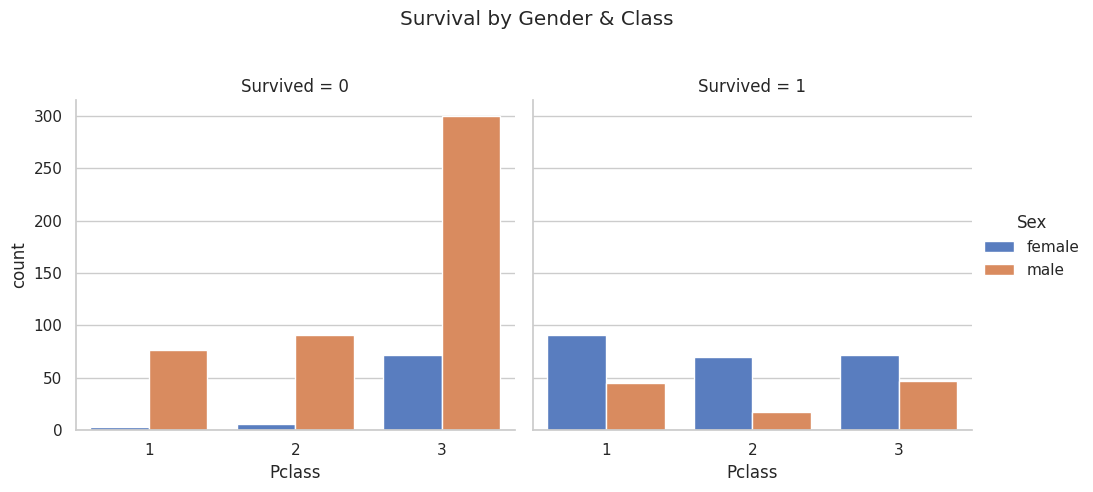

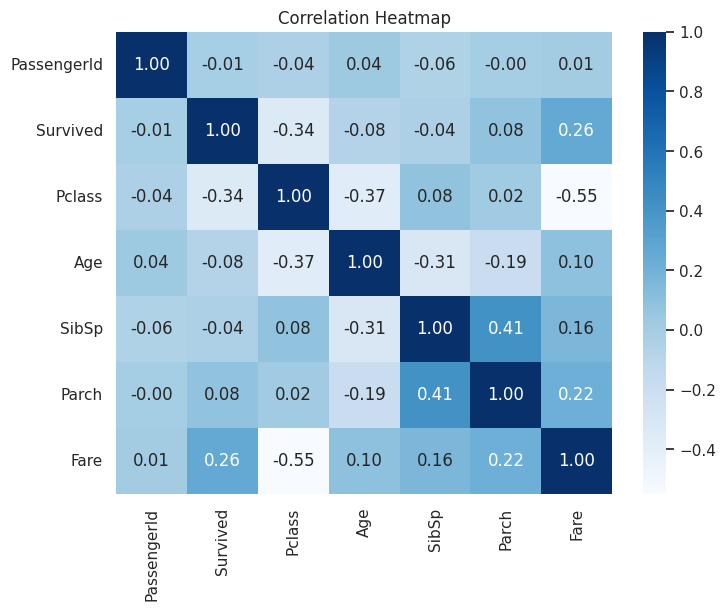

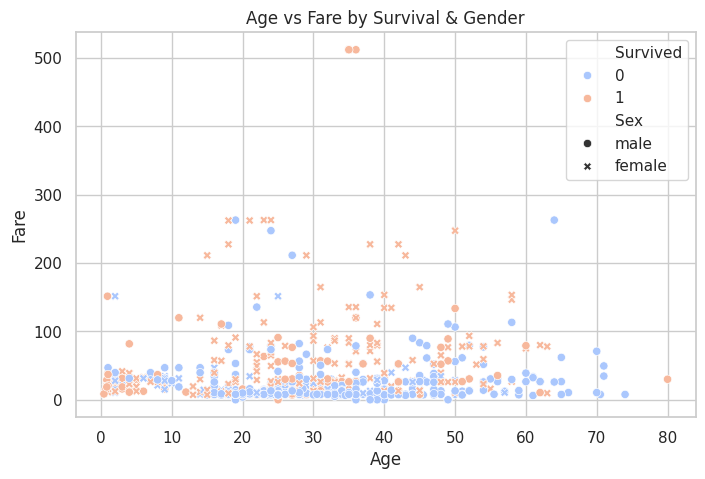

In [31]:
# Survival by Gender & Class
plt.figure(figsize=(8,5))
sns.catplot(data=df, x="Pclass", hue="Sex", col="Survived", kind="count", palette="muted")
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Gender & Class")
plt.show()

# Correlation Heatmap (numerical features only)
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Age vs Fare by Survival (Scatterplot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived", style="Sex", palette="coolwarm")
plt.title("Age vs Fare by Survival & Gender")
plt.show()


**Insights from Titanic Visualizations:**
- **Univariate**:
  - Most passengers were **20–40 years old**.
  - Majority of passengers traveled in **3rd class**.
  - Males were more frequent than females.

- **Bivariate**:
  - Females had a **much higher survival rate** than males.
  - Higher-class passengers (1st Class) had better chances of survival.
  - Ticket **fare increased** significantly for 1st Class.

- **Multivariate**:
  - Survival was highest for **Females in 1st Class**.
  - Correlation shows **Fare & Class** are strongly related.
  - Younger females with higher fares had **better survival odds**.
